In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#LIF model

for freq in range(1, 25):
    dt = 0.1
    t = np.arange(0,1000,dt)
    Vs = np.zeros(len(t))
    I = np.zeros(len(t))
    threshold = -50
    Gl = 0.1
    El = -58
    Cm = 1
    Vs[0] = El
    I_theta = np.array([zap_input(i, freq, dt) for i in range(len(t))])
    for j in range(len(t)-1):
        I[j] = 7
        k1vs = (-Gl*(Vs[j]-El)+I_theta[j])/Cm
        avs = Vs[j] + k1vs*dt
        k2vs = (-Gl*(avs-El)+I_theta[j])/Cm

        Vs[j+1] = Vs[j] + (k1vs+k2vs) * dt/2 
        

        if Vs[j] > threshold:
            Vs[j] = 20 
            Vs[j+1] = -70

    plt.plot(t,Vs)
    plt.show()


NameError: name 'zap_input' is not defined

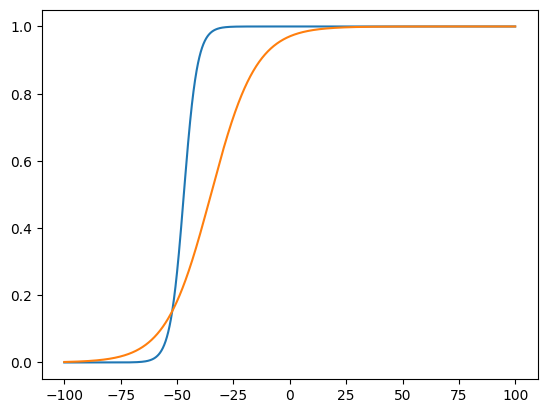

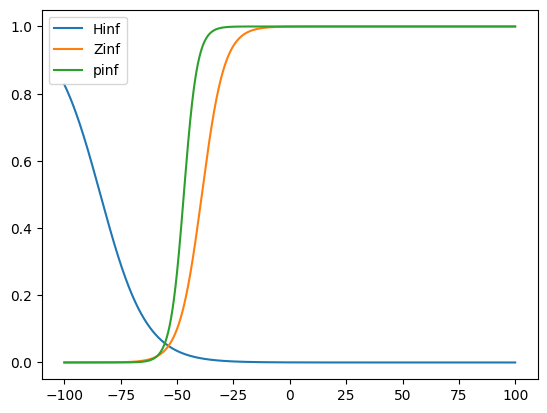

In [8]:
def pinf(V):
    return 1.0/(1+np.exp(-(V--47)/3))#can range from -47 to -41 #
def ninf(V):
    return 1.0/(1+np.exp(-(V--35)/10))
def taun(V):
    return 0.1 + 0.5*(1.0/(1+np.exp(-(V--27)/-15)))
def Zinf(V):
    return 1.0/(1+np.exp(-(V--39)/5))
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def minf(V):
    return 1.0/(1+np.exp(-(V--30)/9.5))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1
V_range = np.arange(-100,100,.1)

plt.plot(V_range, pinf(V_range))
plt.plot(V_range, ninf(V_range))
plt.show()
plt.plot(V_range, Hinf(V_range), label = "Hinf")
plt.plot(V_range, Zinf(V_range), label = "Zinf")
plt.plot(V_range, pinf(V_range), label = "pinf")
plt.legend()




In [ ]:
# def alpha_m(V):
#     return (0.1*(V+25))/(np.exp(0.1*(V+25))-1)#(10**5)*(-V - 0.045) / (np.exp(100*(-V-0.045))-1)

# def beta_m(V):
#     return 4*np.exp(V/18)#4*10**3*np.exp((-V-0.070)/0.018)

# def minf(V):
#     return alpha_m(V) / (alpha_m(V) + beta_m(V))

# def alpha_h(V):
#     return 0.07*np.exp(V/20)#70*np.exp(50*(-V-0.07))

# def beta_h(V):
#     return 1/(1+np.exp((V+30)/10))#(10**3) / (1 + np.exp(100*(-V-0.040)))

# def hinf(V):
#     return alpha_h(V) / (alpha_h(V) + beta_h(V))

# def alpha_n(V):
#     return (0.01*(V+10))/(np.exp(0.1*(V+10))-1)#((10**4) * (-V- 0.06)) / (np.exp(100*(-V-0.06))-1)

# def beta_n(V):
#     return 0.125*np.exp((V)/80)#125 * np.exp((-V-0.07)/0.08)

# def ninf(V):
#     return alpha_n(V) / (alpha_n(V) + beta_n(V))

# V_range = np.arange(-100,20,.1)

# plt.plot(V_range, minf(V_range),label="minf")
# plt.plot(V_range, hinf(V_range),label="hinf")
# plt.plot(V_range, ninf(V_range),label="ninf")
# plt.legend()



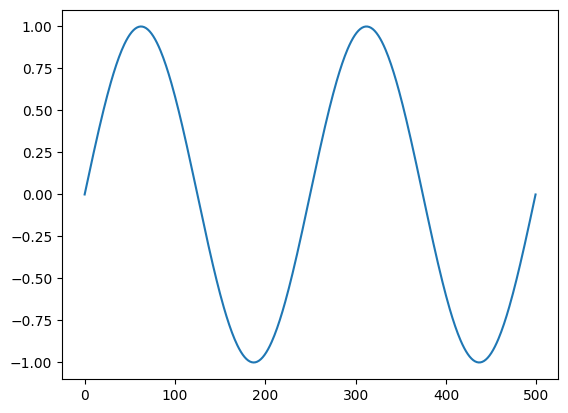

In [ ]:

t = np.linspace(0, 10, 500)
omega = (2 * np.pi) / 5
Iapp = np.sin(omega * t)

plt.plot(Iapp)

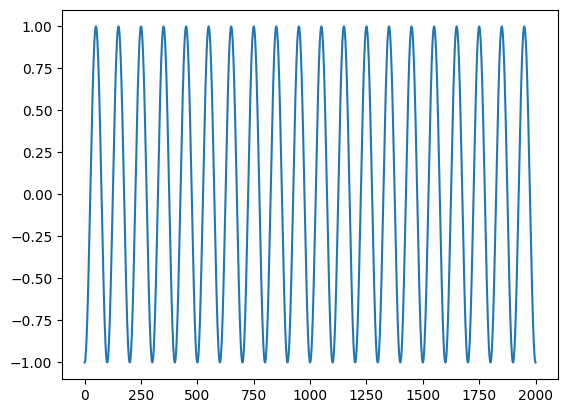

In [5]:
dt =0.01

t = np.arange(0,2000,dt)

N = len(t)
def zap_input(i, Fzap, dt):
    return np.sin(2 * np.pi * Fzap * 10**-3 * i * dt + 3 * np.pi / 2)

I_theta = np.array([zap_input(i, 10, dt) for i in range(N)])

plt.plot(t,I_theta)

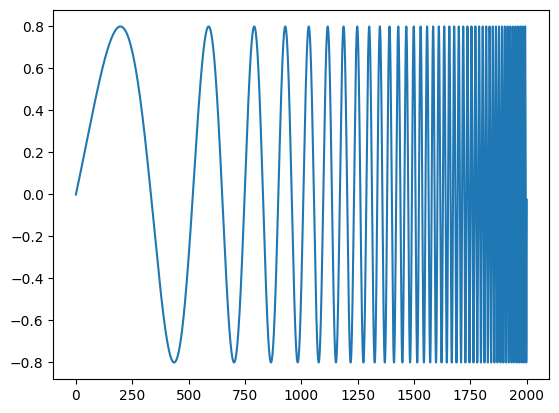

In [6]:
def zap_log(t, f_start=0.0, f_end=100.0, amplitude=1):
    T = t[-1] - t[0]
    k = np.log(f_end / f_start) / T
    phase = 2 * np.pi * f_start * (np.exp(k * t) - 1) / k
    I_zap = amplitude * np.sin(phase)
    freq_inst = f_start * np.exp(k * t)
    return I_zap, freq_inst

I_chirp, freq_inst = zap_log(t/1000.0, f_start=1, f_end=100.0, amplitude=.8)

plt.plot(t,I_chirp)

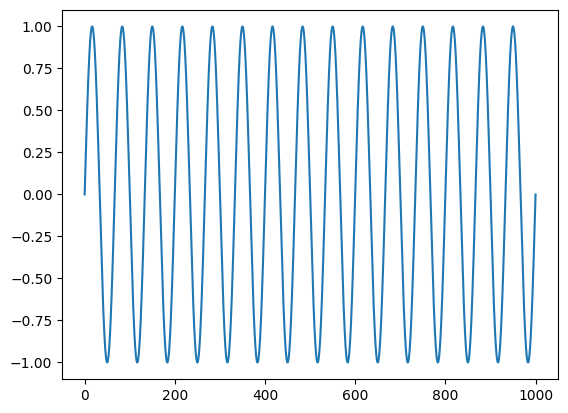

In [ ]:
f = 15
amplitude = 1
T = t[-1] - t[0]
phase = 2 * np.pi * f * t /T
I_zap = amplitude * np.sin(phase)

plt.plot(t,I_zap)


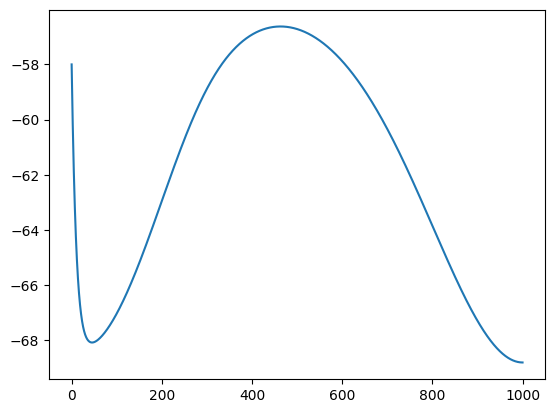

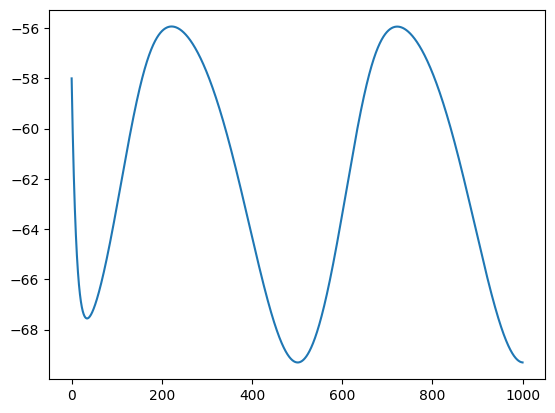

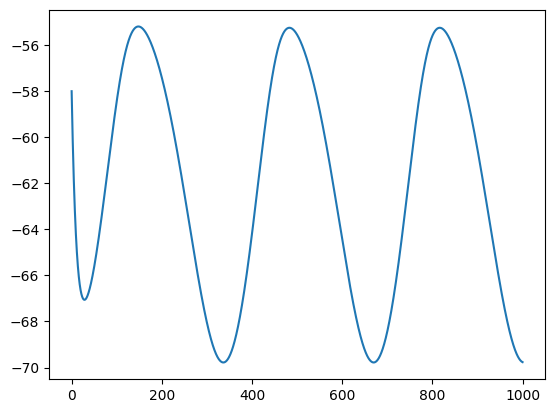

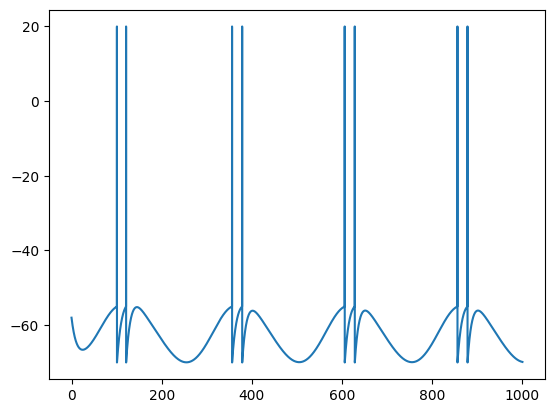

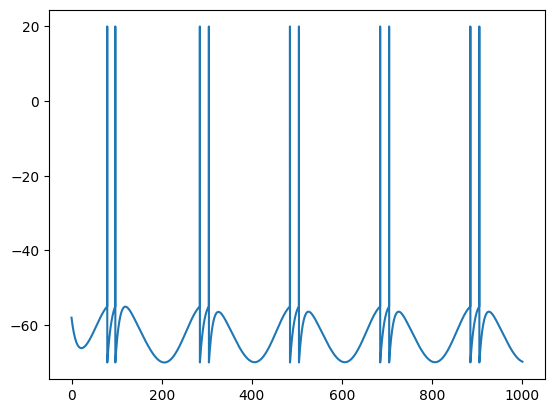

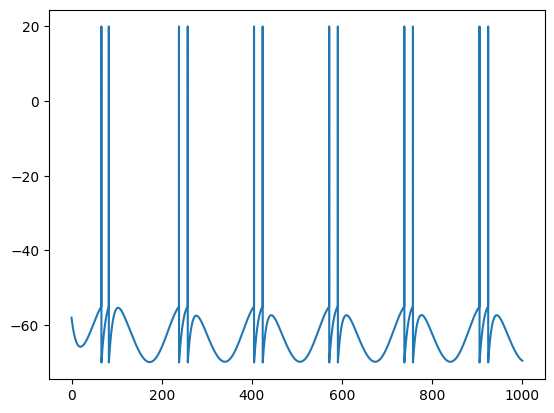

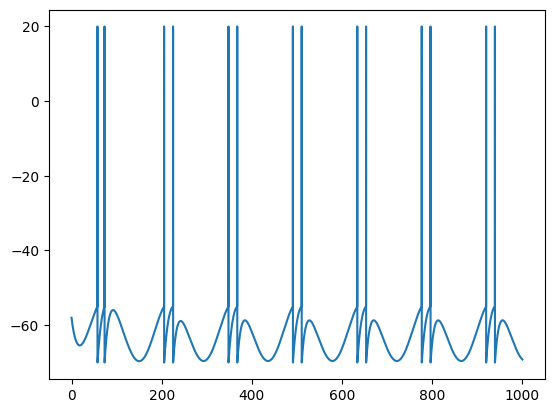

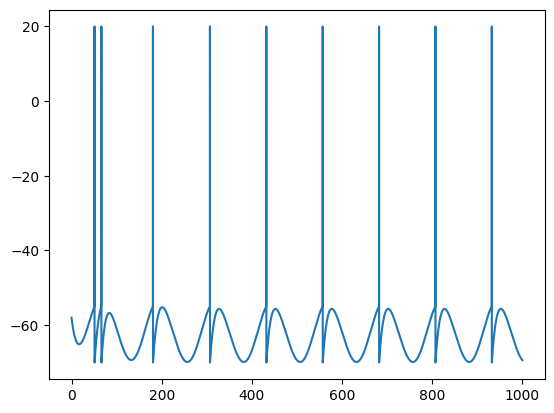

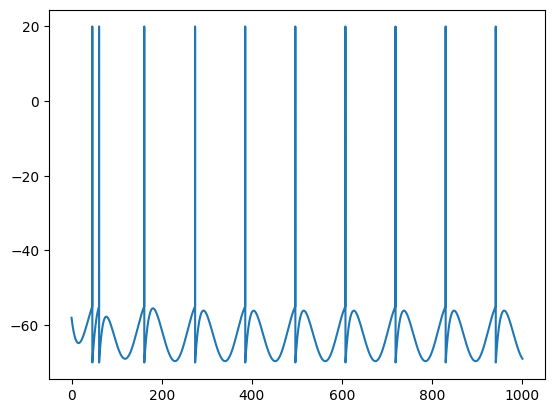

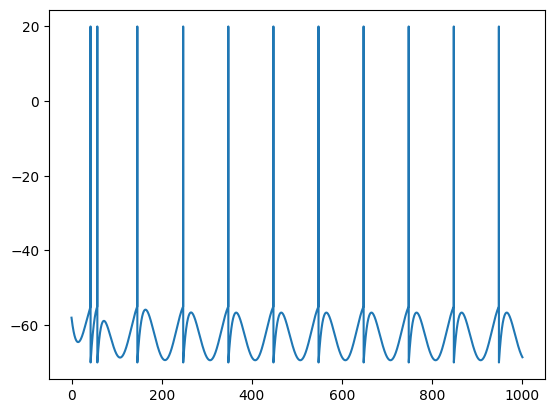

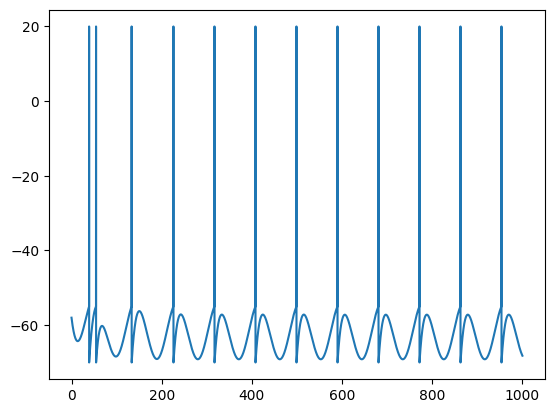

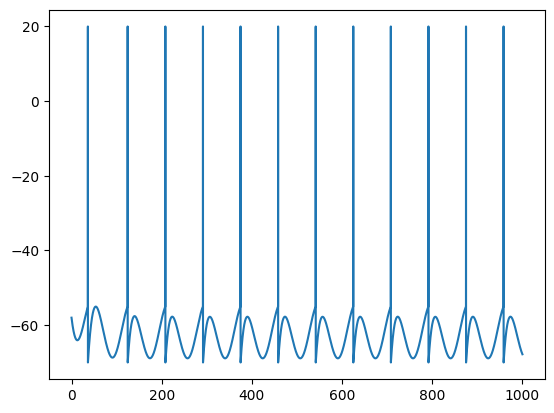

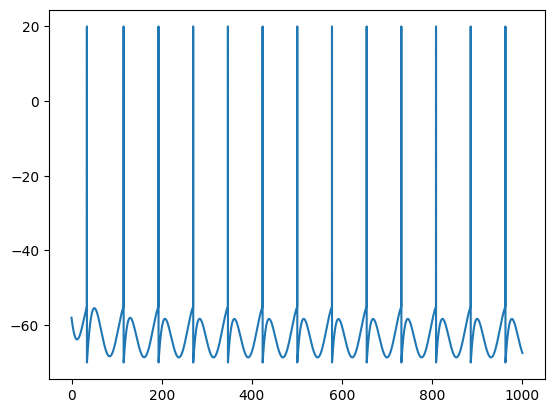

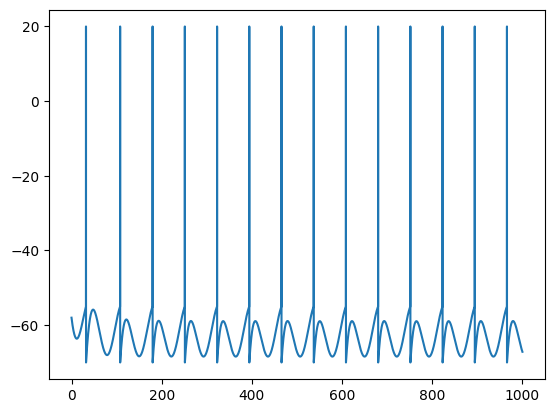

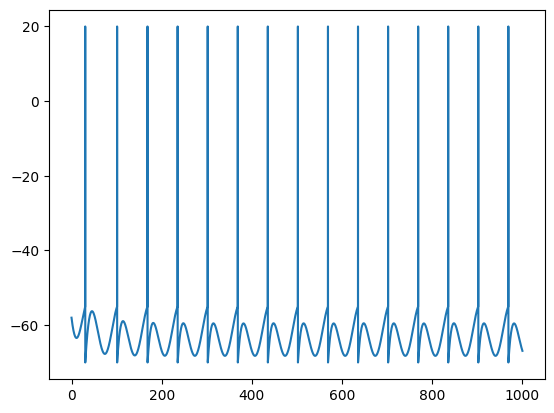

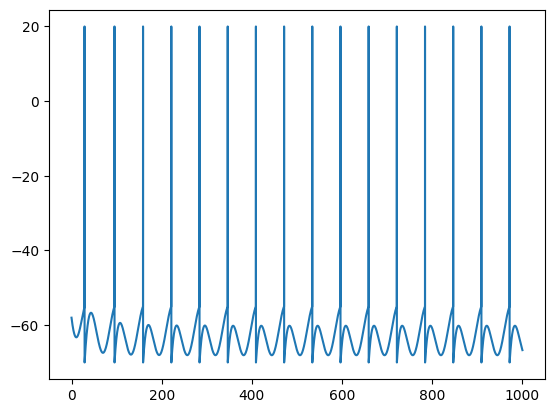

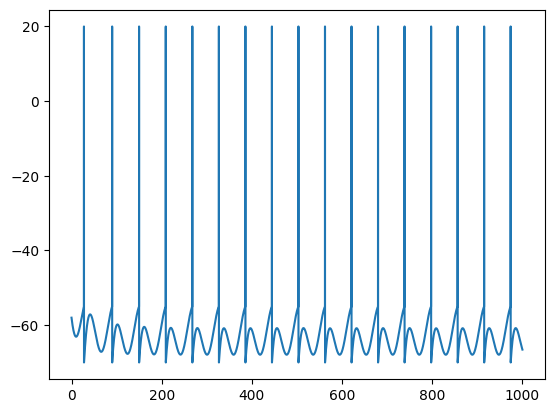

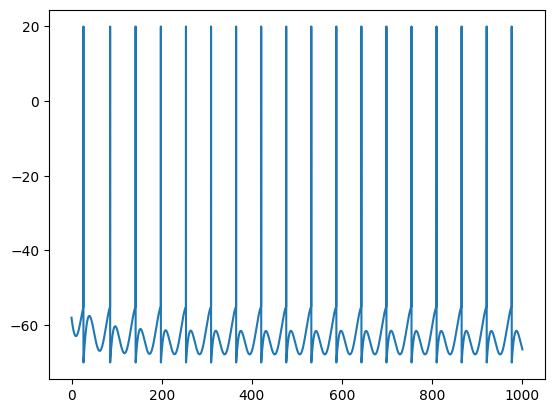

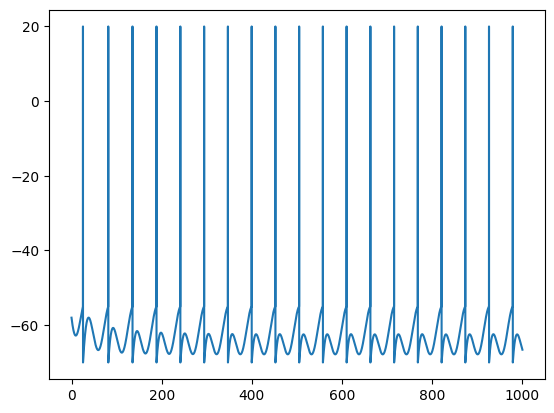

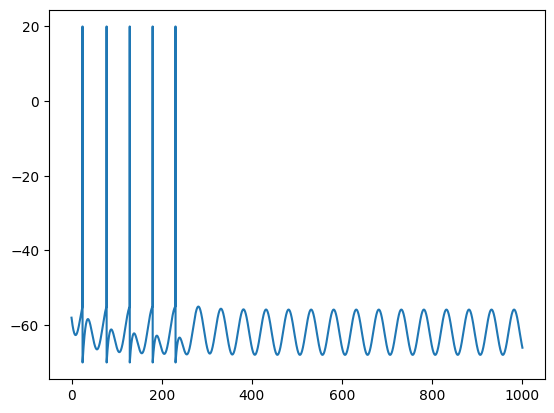

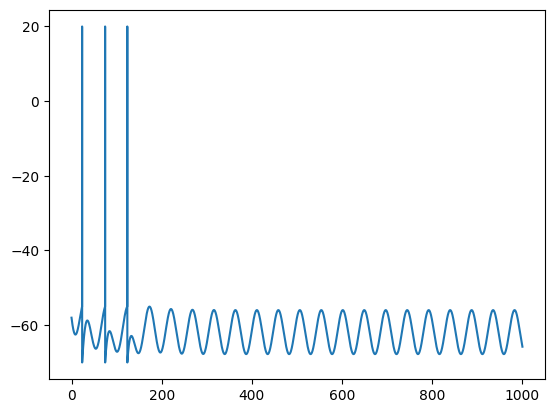

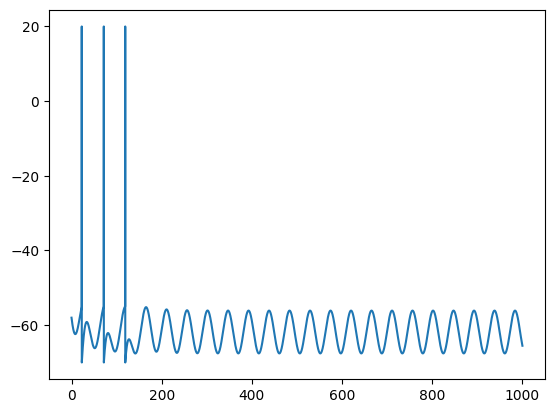

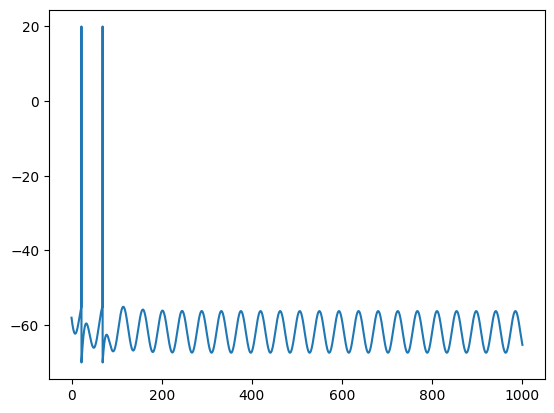

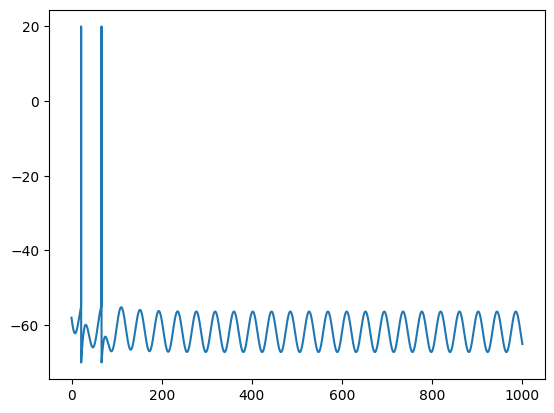

In [11]:
#LIF model

for freq in range(1, 25):
    dt = 0.1
    t = np.arange(0,1000,dt)
    Vs = np.zeros(len(t))
    I = np.zeros(len(t))
    H = np.zeros(len(t))
    Z = np.zeros(len(t))
    threshold = -55
    Gl = 0.1
    El = -58
    Ena = 55
    Ek = -90
    Eh = -32.9
    Gm = 1
    Gnap = 0
    Gh = 0
    Cm = 1
    Vs[0] = El
    I_theta = np.array([zap_input(i, freq, dt) for i in range(len(t))])
    for j in range(len(t)-1):

        k1vs = (-Gl*(Vs[j]-El)
        -Gnap*pinf(Vs[j])*(Vs[j]-Ena)
        -Gm*Z[j]*(Vs[j]-Ek)
        -Gh*H[j]*(Vs[j]-Eh)
        +I_theta[j])/Cm
    
        k1Z = (Zinf(Vs[j])-Z[j])/75
        k1H = (Hinf(Vs[j])-H[j])/tauH(Vs[j])

        avs = Vs[j] + k1vs*dt
        aZ = Z[j] + k1Z *dt
        aH = H[j]+k1H*dt

        k2vs = (-Gl*(avs-El)
            -Gnap*pinf(avs)*(avs-Ena)
            -Gh*aH*(avs-Eh)
            -Gm*aZ*(avs-Ek)
            +I_theta[j])/Cm
        
        k2Z = (Zinf(avs)-aZ)/75
        k2H = (Hinf(avs)-aH)/tauH(avs)

        Vs[j+1] = Vs[j] + (k1vs+k2vs) * dt/2
        Z[j+1] = Z[j] + (k1Z+k2Z)*dt/2
        H[j+1] = H[j]+(k1H+k2H)*dt/2 
        
        if Vs[j] > threshold:
            Vs[j] = 20 
            Vs[j+1] = -70

    plt.plot(t,Vs)
    plt.show()


In [ ]:

Gnap = 0
Gk = 0
Ena = 55
Ek = -90
Cm = 1
dt = 0.01
Gl= 0.1
El = -78
Gm = 1
Gna = 0
Gh = 1
Eh = - 32.9
n = np.zeros(len(t))
Z = np.zeros(len(t))
Vs = np.zeros(len(t))
I = np.zeros(len(t))
h = np.zeros(len(t))
H = np.zeros(len(t))
Vs[0]=El

dt =0.01

t = np.arange(0,1000,dt)

N = len(t)
I_theta = np.array([zap_input(i, 10, dt) for i in range(N)])

0


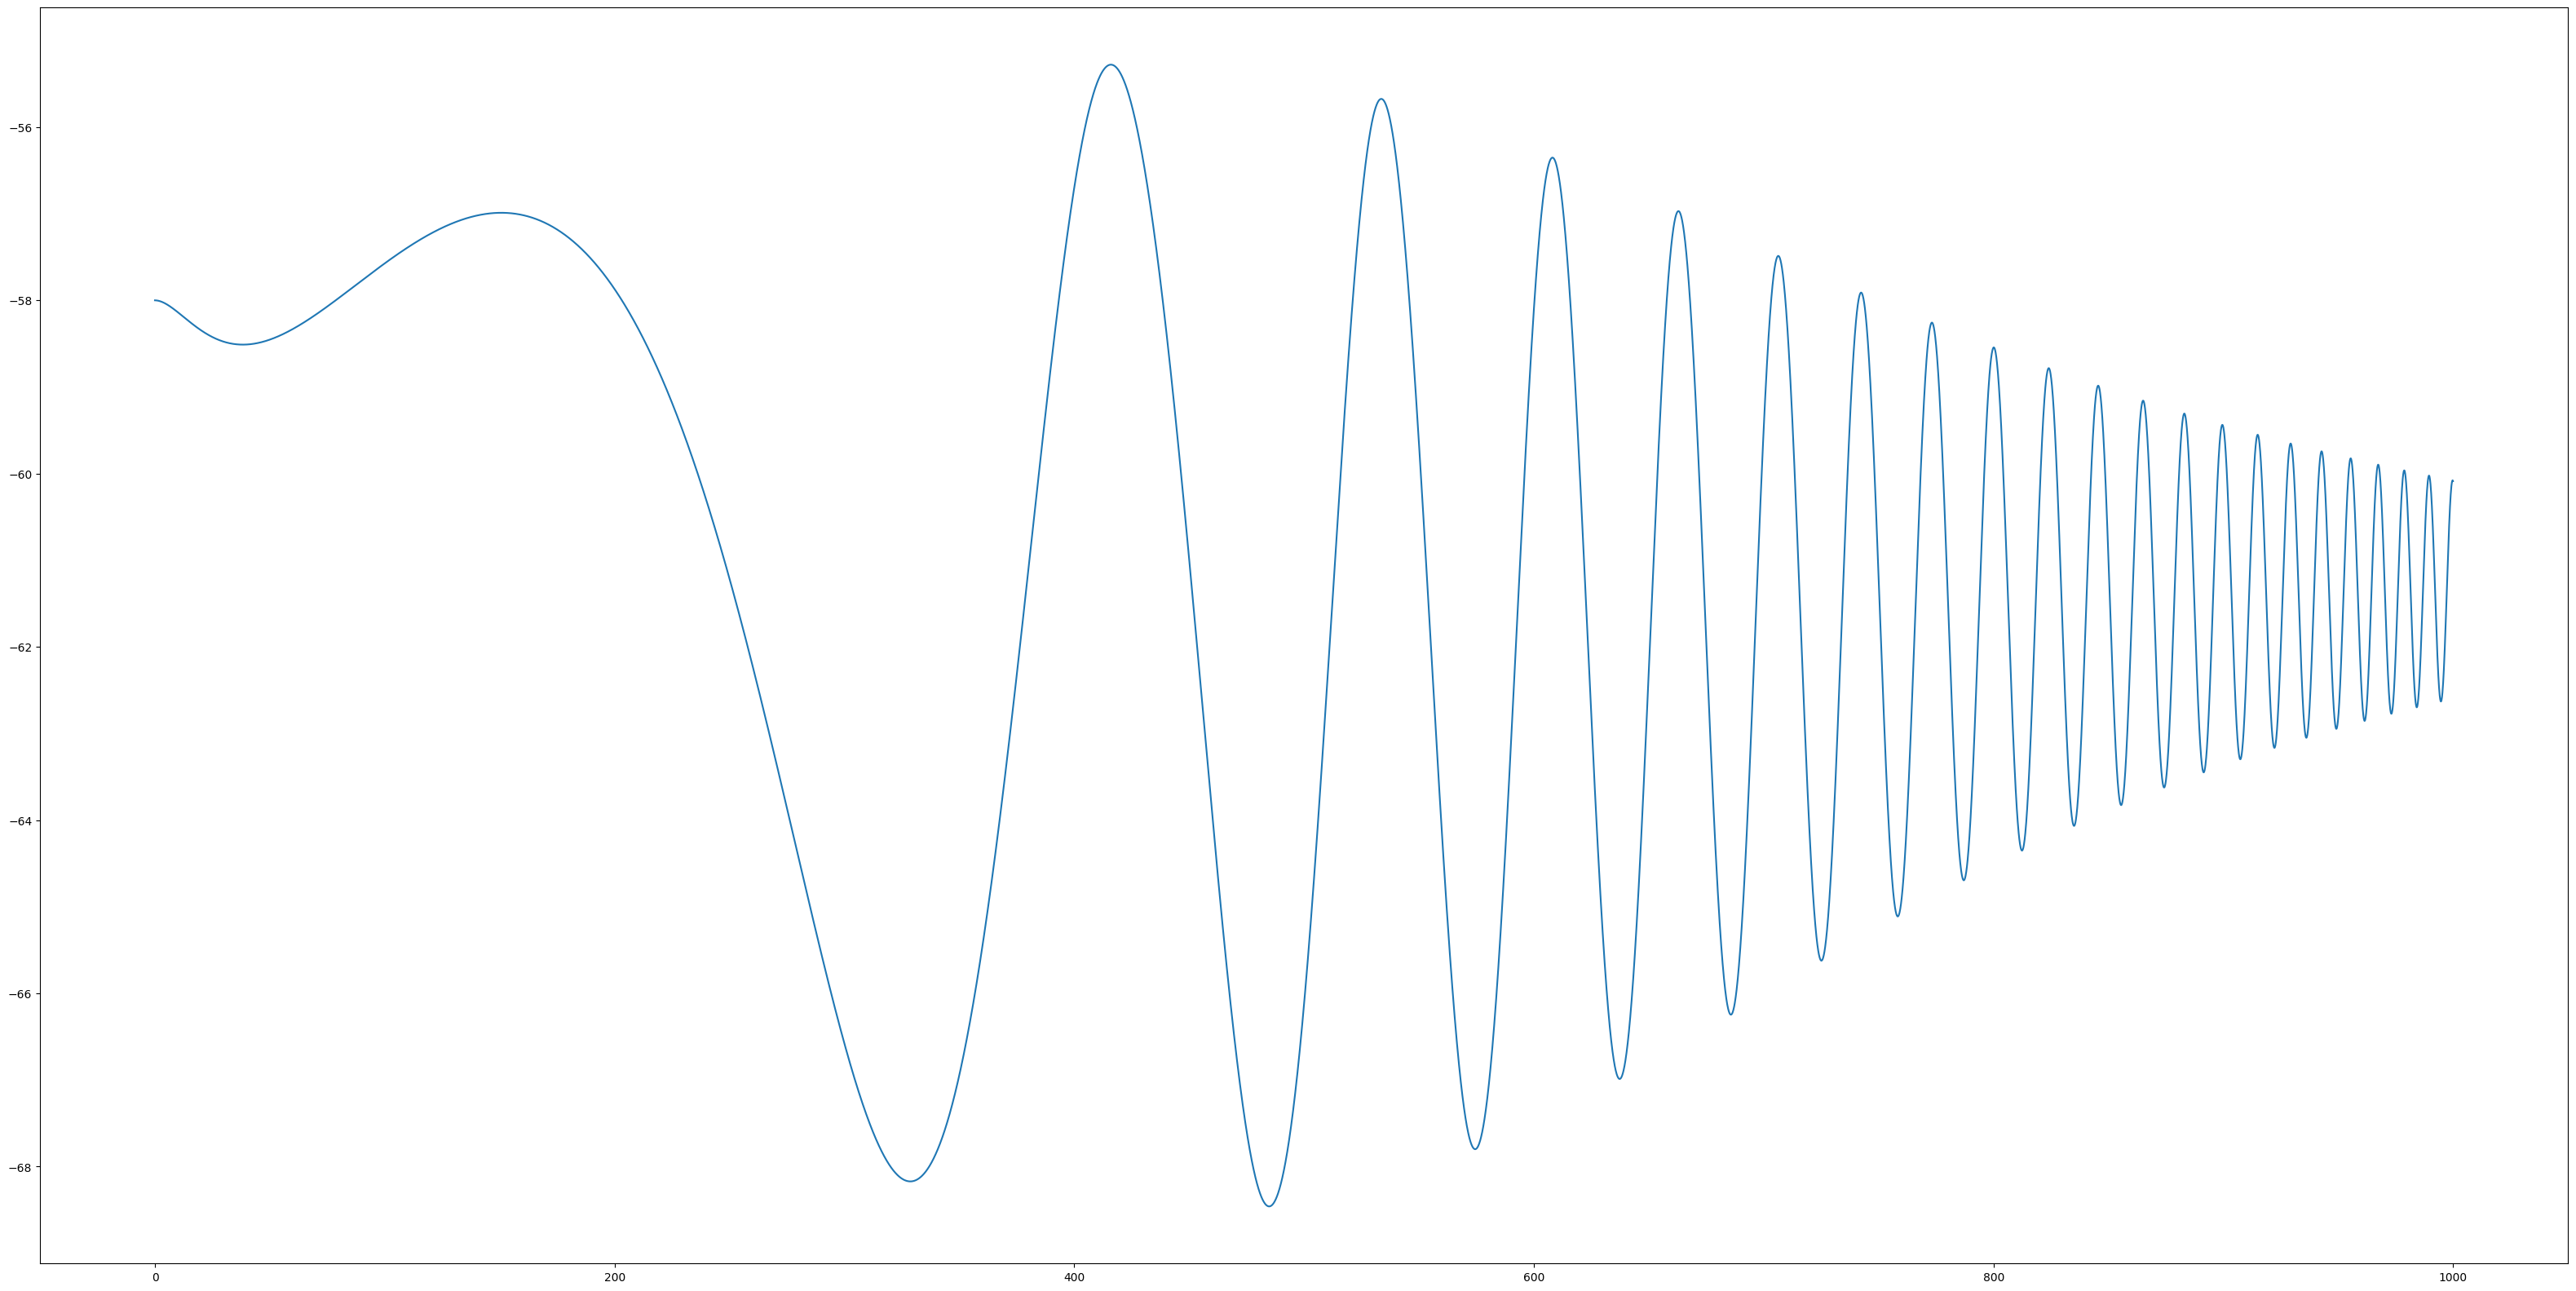

In [ ]:
dt =0.1

t = np.arange(0,1000,dt)

N = len(t)
Gnap = 0
Gk = 0
Ena = 55
Ek = -90
Cm = 1
dt = 0.1
Gl= 0.1
El = -58
Gm = 1
Gna = 0
Gh = 0
Eh = - 32.9
n = np.zeros(len(t))
Z = np.zeros(len(t))
Vs = np.zeros(len(t))
I = np.zeros(len(t))
h = np.zeros(len(t))
H = np.zeros(len(t))
Vs[0]=El


I_theta = np.array([zap_input(i, 10, dt) for i in range(len(t))])
for j in range(len(t)-1):
    I[j] = 1

    k1vs = (-Gl*(Vs[j]-El)
        -Gnap*pinf(Vs[j])*(Vs[j]-Ena)
        -Gm*Z[j]*(Vs[j]-Ek)
        -Gh*H[j]*(Vs[j]-Eh)
        -Gna*(minf(Vs[j])**3)*h[j]*(Vs[j]-Ena)
        -Gk*(n[j]**4)* (Vs[j]-Ek)
        +I_chirp[j])/Cm
    
    k1n = (ninf(Vs[j])-n[j])/taun(Vs[j])
    k1Z = (Zinf(Vs[j])-Z[j])/75
    k1h = (hinf(Vs[j])-h[j])/tauh(Vs[j]);
    k1H = (Hinf(Vs[j])-H[j])/tauH(Vs[j])

    avs = Vs[j] + k1vs*dt
    an = n[j] + k1n * dt
    aZ = Z[j] + k1Z *dt
    ah = h[j]+k1h*dt
    aH = H[j]+k1H*dt;

    k2vs = (-Gl*(avs-El)
        -Gnap*pinf(avs)*(avs-Ena)
        -Gh*aH*(avs-Eh)
        -Gm*aZ*(avs-Ek)
        -Gna*(minf(avs)**3)*ah*(avs-Ena)
        -Gk*(an**4)*(avs-Ek)
        +I_chirp[j])/Cm
    
    k2n = (ninf(avs)-an)/taun(avs)
    k2Z = (Zinf(avs)-aZ)/75
    k2h = (hinf(avs)-ah)/tauh(avs)
    k2H = (Hinf(avs)-aH)/tauH(avs)

    Vs[j+1] = Vs[j] + (k1vs+k2vs) * dt/2
    n[j+1] = n[j] + (k1n+k2n) * dt/2 
    Z[j+1] = Z[j] + (k1Z+k2Z)*dt/2
    h[j+1] = h[j]+(k1h+k2h)*dt/2
    H[j+1] = H[j]+(k1H+k2H)*dt/2

plt.figure(figsize=(40,20))
plt.plot(t,Vs) 


from scipy.signal import find_peaks
peaks, _ = find_peaks(Vs, height=0)
    
spike_times = np.array(t)[peaks]
 
spike_count = len(spike_times)
print(spike_count)



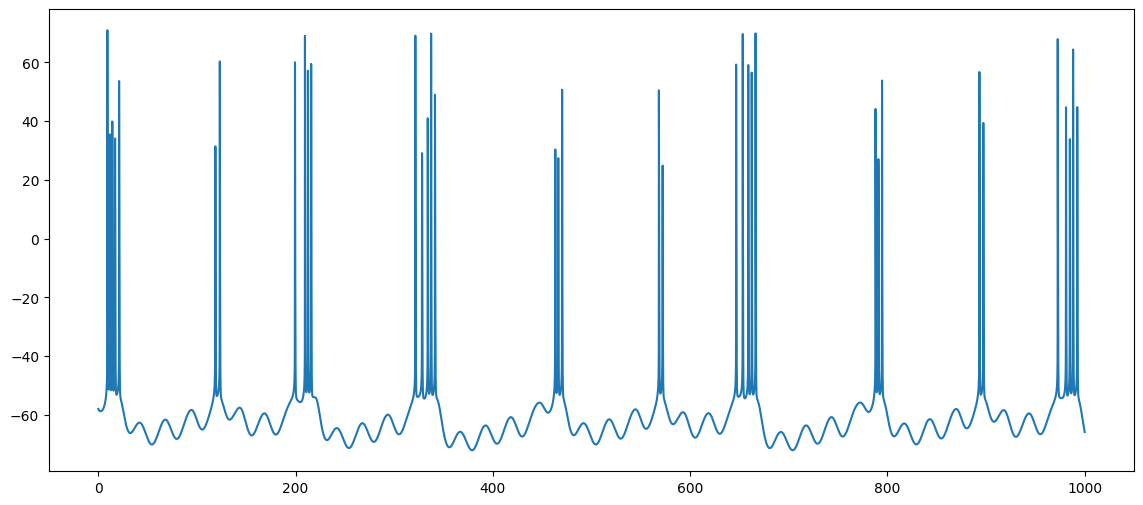

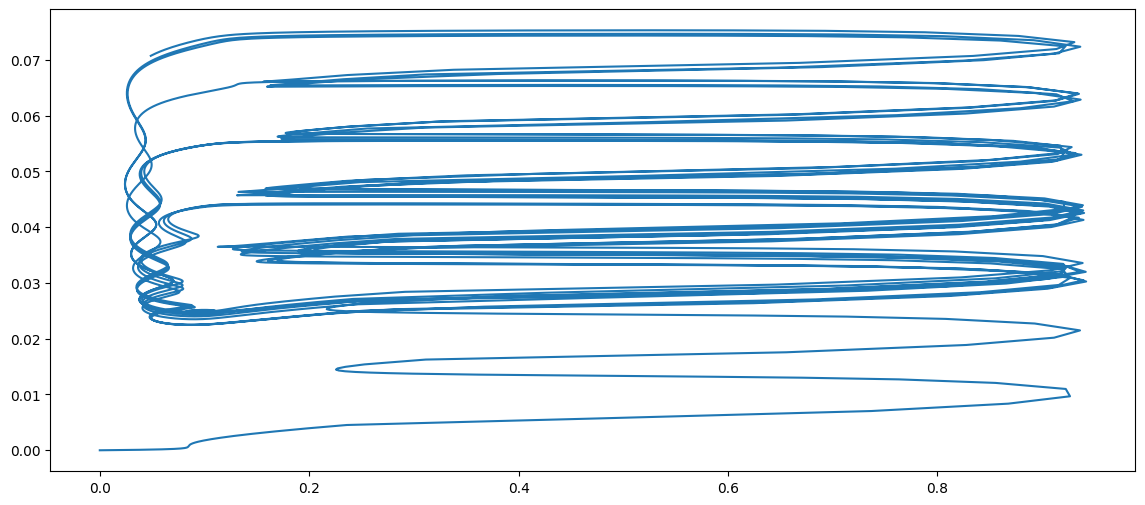

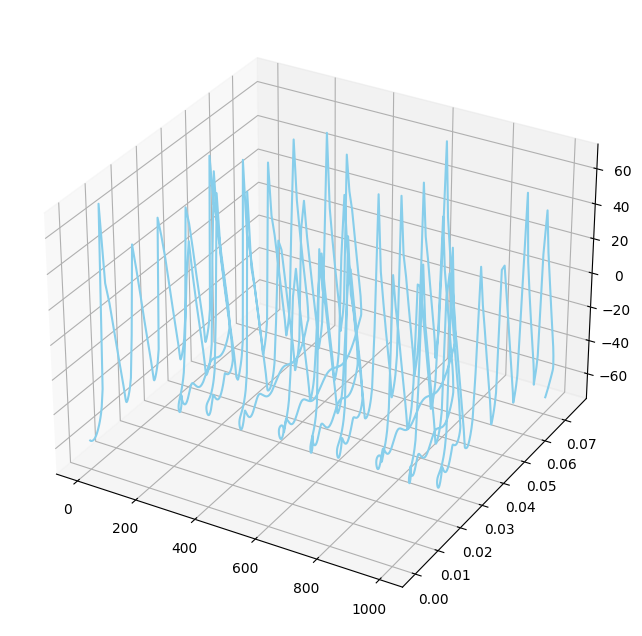

Total spikes: 36
Single spikes: 1
Burst spikes: 35
Spikes per burst: [5, 2, 3, 5, 3, 2, 5, 3, 2, 5]
# of burst: 10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

dt = 0.1
t = np.arange(0, 1000, dt)
N = len(t)
Cm = 1
Ena = 55
Ek = -90
El = -58
Eh = -32.9
Gl = 0.1
Gm = 1
Gnap = 0
Gk = 4
Gna = 85
Gh = 0

all_spike_times = []
all_freqs = []
burst_counts = []
single_counts = []

I_theta = np.array([zap_input(i, 40, dt) for i in range(N)])
n = np.zeros(N)
Z = np.zeros(N)
Vs = np.zeros(N)
I = np.zeros(N)
h = np.zeros(N)
H = np.zeros(N)
Vs[0] = El

for j in range(N - 1):
    I[j] = 1

    k1vs = (-Gl * (Vs[j] - El)
            - Gnap * pinf(Vs[j]) * (Vs[j] - Ena)
            - Gm * Z[j] * (Vs[j] - Ek)
            - Gh * H[j] * (Vs[j] - Eh)
            - Gna * (minf(Vs[j]) ** 3) * h[j] * (Vs[j] - Ena)
            - Gk * (n[j] ** 4) * (Vs[j] - Ek)
            + I_theta[j]) / Cm

    k1n = (ninf(Vs[j]) - n[j]) / taun(Vs[j])
    k1Z = (Zinf(Vs[j]) - Z[j]) / 75
    k1h = (hinf(Vs[j]) - h[j]) / tauh(Vs[j])
    k1H = (Hinf(Vs[j]) - H[j]) / tauH(Vs[j])

    avs = Vs[j] + k1vs * dt
    an = n[j] + k1n * dt
    aZ = Z[j] + k1Z * dt
    ah = h[j] + k1h * dt
    aH = H[j] + k1H * dt

    k2vs = (-Gl * (avs - El)
            - Gnap * pinf(avs) * (avs - Ena)
            - Gh * aH * (avs - Eh)
            - Gm * aZ * (avs - Ek)
            - Gna * (minf(avs) ** 3) * ah * (avs - Ena)
            - Gk * (an ** 4) * (avs - Ek)
            + I_theta[j]) / Cm

    k2n = (ninf(avs) - an) / taun(avs)
    k2Z = (Zinf(avs) - aZ) / 75
    k2h = (hinf(avs) - ah) / tauh(avs)
    k2H = (Hinf(avs) - aH) / tauH(avs)

    Vs[j + 1] = Vs[j] + (k1vs + k2vs) * dt / 2
    n[j + 1] = n[j] + (k1n + k2n) * dt / 2
    Z[j + 1] = Z[j] + (k1Z + k2Z) * dt / 2
    h[j + 1] = h[j] + (k1h + k2h) * dt / 2
    H[j + 1] = H[j] + (k1H + k2H) * dt / 2

peaks, _ = find_peaks(Vs, height=0)
spike_times = t[peaks]
all_spike_times.append(spike_times)
all_freqs.append(np.full_like(spike_times, 40))

isi = np.diff(spike_times)
burst_threshold = 10

burst_starts = []
spikes_per_burst = []
used_indices = set()
i = 0
while i < len(isi):
    if isi[i] < burst_threshold:
        start_index = i
        burst_intervals = 1
        used_indices.add(i)
        used_indices.add(i + 1)
        while i + 1 < len(isi) and isi[i + 1] < burst_threshold:
            i += 1
            burst_intervals += 1
            used_indices.add(i + 1)
        burst_starts.append(start_index)
        spikes_per_burst.append(burst_intervals + 1)
    i += 1

burst_spikes = 0
single_spikes = 0
for idx, _ in enumerate(spike_times):
    if idx in used_indices:
        burst_spikes += 1
    else:
        single_spikes += 1

burst_counts.append(len(spikes_per_burst))
single_counts.append(single_spikes)

raster_x = np.concatenate(all_spike_times)
raster_y = np.concatenate(all_freqs)

spike_totals = [len(st) for st in all_spike_times]

plt.figure(figsize=(14, 6))
plt.plot(t, Vs)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(n, Z)
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, Z, Vs, c='skyblue')
plt.show()

burst_num = len(spikes_per_burst)
print(f"Total spikes: {spike_totals[0]}")
print(f"Single spikes: {single_spikes}")
print(f"Burst spikes: {burst_spikes}")
print(f"Spikes per burst: {spikes_per_burst}")
print(f"# of burst: {burst_num}")


In [ ]:
# Assume `isi` is a pre-calculated list of interspike intervals
# Assume `burst_threshold` is a defined value
burst_starts = []  # Stores the starting index of each burst
spikes_per_burst = [] # Stores the spike count for each burst

i = 0
while i < len(isi):
    if isi[i] < burst_threshold:
        start_index = i
        burst_intervals = 1
        
        # Continue advancing as long as the ISI is below the threshold
        while i + 1 < len(isi) and isi[i + 1] < burst_threshold:
            i += 1
            burst_intervals += 1
        
        # A burst requires at least two spikes, which means at least one interval
        if burst_intervals >= 1:
            burst_starts.append(start_index)
            # The number of spikes is the number of intervals plus one
            spikes_per_burst.append(burst_intervals + 1)
        
    i += 1

print("Start index of each detected burst:", burst_starts)
print("Number of spikes for each burst:", spikes_per_burst)


Start index of each detected burst: [5, 7, 24, 26]
Number of spikes for each burst: [2, 2, 2, 2]


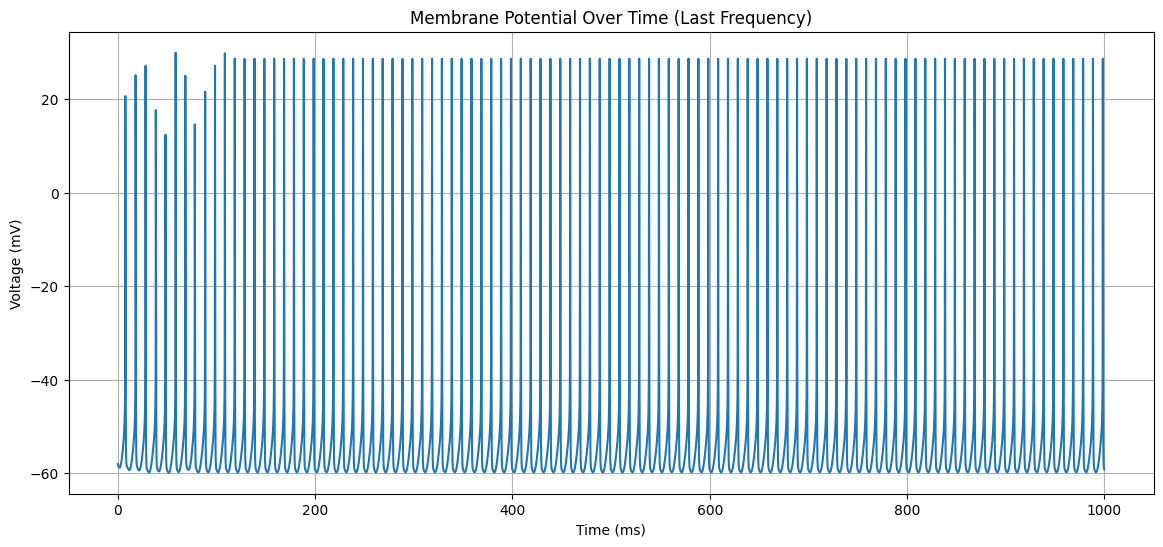

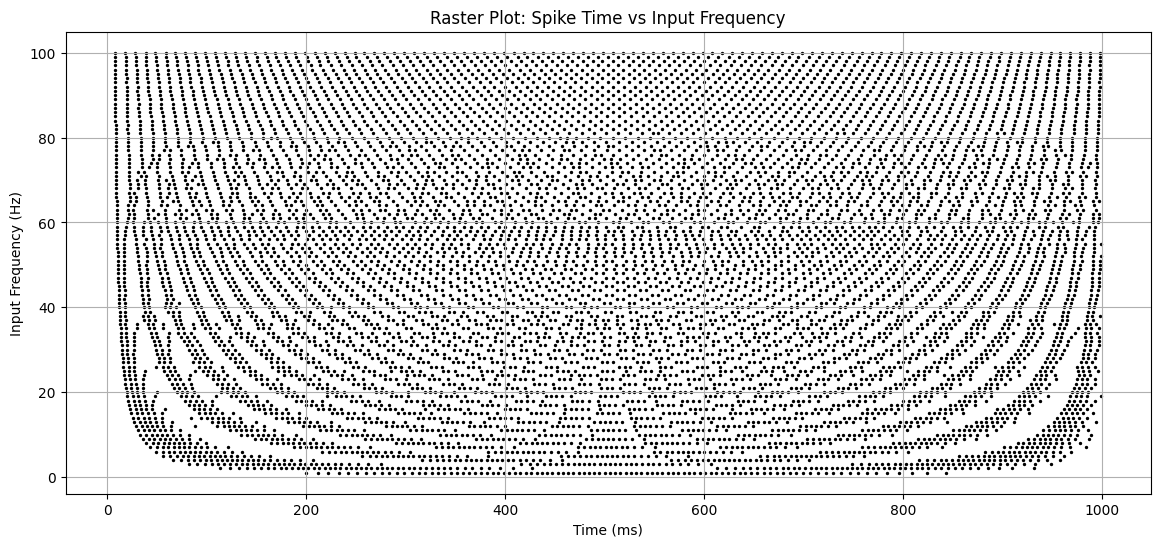

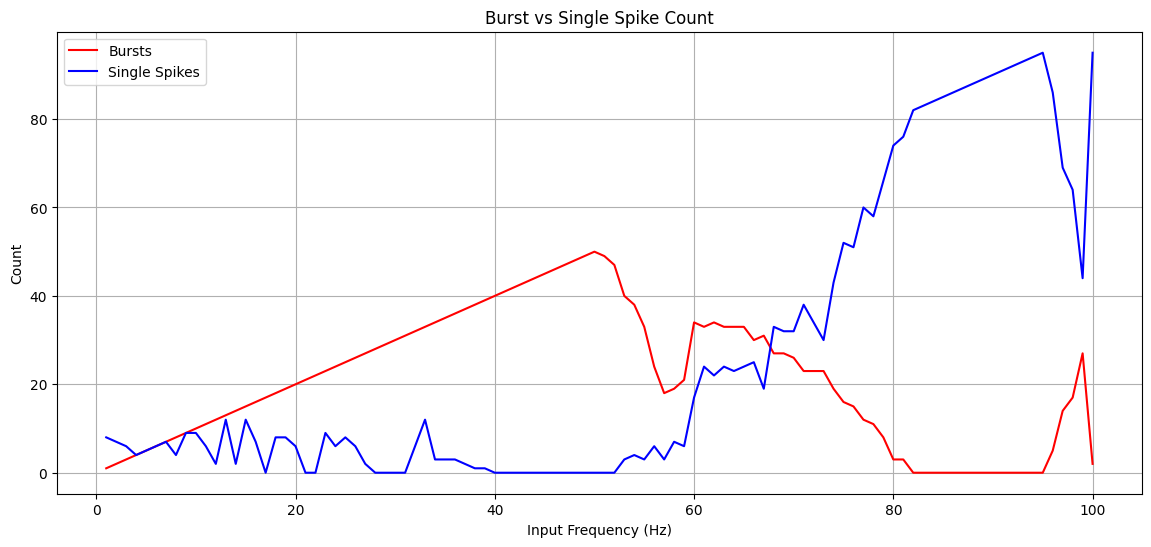

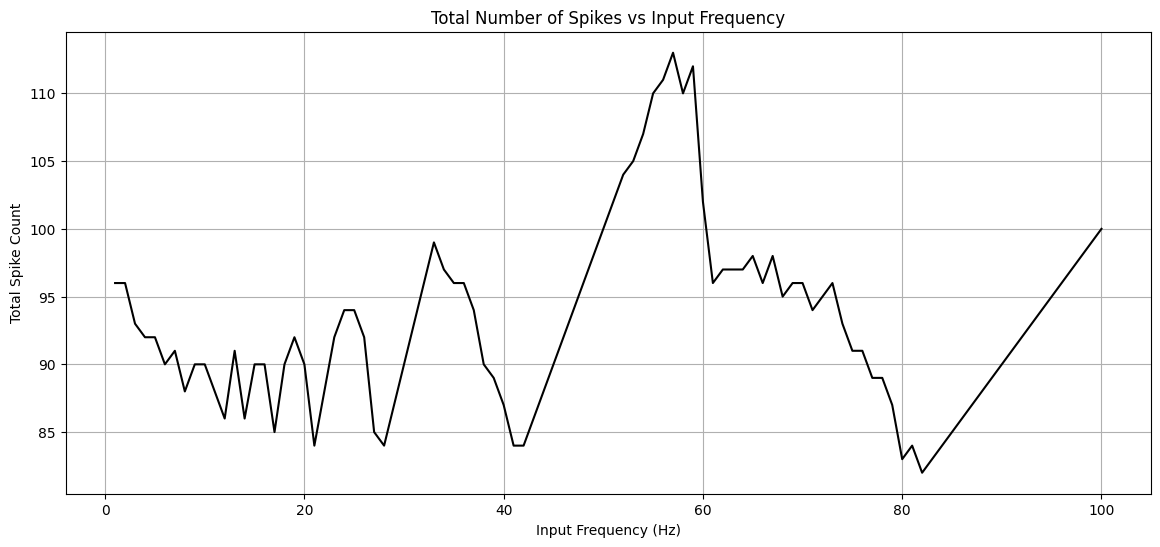

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

dt = 0.1
t = np.arange(0, 1000, dt)
N = len(t)
Cm = 1
Ena = 55
Ek = -90
El = -58
Eh = -32.9
Gl = 0.1
Gm = 0
Gnap = 0
Gk = 6
Gna = 55
Gh = 0

all_spike_times = []
all_freqs = []
burst_counts = []
single_counts = []
spikes_per_burst_all = []

for freq in range(1, 101):
    I_theta = np.array([zap_input(i, freq, dt) for i in range(N)])
    n = np.zeros(N)
    Z = np.zeros(N)
    Vs = np.zeros(N)
    I = np.zeros(N)
    h = np.zeros(N)
    H = np.zeros(N)
    Vs[0] = El

    for j in range(N - 1):
        I[j] = 1

        k1vs = (-Gl * (Vs[j] - El)
                - Gnap * pinf(Vs[j]) * (Vs[j] - Ena)
                - Gm * Z[j] * (Vs[j] - Ek)
                - Gh * H[j] * (Vs[j] - Eh)
                - Gna * (minf(Vs[j]) ** 3) * h[j] * (Vs[j] - Ena)
                - Gk * (n[j] ** 4) * (Vs[j] - Ek)
                + I_theta[j]) / Cm

        k1n = (ninf(Vs[j]) - n[j]) / taun(Vs[j])
        k1Z = (Zinf(Vs[j]) - Z[j]) / 75
        k1h = (hinf(Vs[j]) - h[j]) / tauh(Vs[j])
        k1H = (Hinf(Vs[j]) - H[j]) / tauH(Vs[j])

        avs = Vs[j] + k1vs * dt
        an = n[j] + k1n * dt
        aZ = Z[j] + k1Z * dt
        ah = h[j] + k1h * dt
        aH = H[j] + k1H * dt

        k2vs = (-Gl * (avs - El)
                - Gnap * pinf(avs) * (avs - Ena)
                - Gh * aH * (avs - Eh)
                - Gm * aZ * (avs - Ek)
                - Gna * (minf(avs) ** 3) * ah * (avs - Ena)
                - Gk * (an ** 4) * (avs - Ek)
                + I_theta[j]) / Cm

        k2n = (ninf(avs) - an) / taun(avs)
        k2Z = (Zinf(avs) - aZ) / 75
        k2h = (hinf(avs) - ah) / tauh(avs)
        k2H = (Hinf(avs) - aH) / tauH(avs)

        Vs[j + 1] = Vs[j] + (k1vs + k2vs) * dt / 2
        n[j + 1] = n[j] + (k1n + k2n) * dt / 2
        Z[j + 1] = Z[j] + (k1Z + k2Z) * dt / 2
        h[j + 1] = h[j] + (k1h + k2h) * dt / 2
        H[j + 1] = H[j] + (k1H + k2H) * dt / 2

    peaks, _ = find_peaks(Vs, height=0)
    spike_times = t[peaks]
    all_spike_times.append(spike_times)
    all_freqs.append(np.full_like(spike_times, freq))

    isi = np.diff(spike_times)
    burst_threshold = 10
    burst_starts = []
    spikes_per_burst = []

    i = 0
    used_indices = set()
    while i < len(isi):
        if isi[i] < burst_threshold:
            start = i
            count = 2
            used_indices.add(i)
            used_indices.add(i + 1)
            while i + 1 < len(isi) and isi[i + 1] < burst_threshold:
                i += 1
                count += 1
                used_indices.add(i + 1)
            burst_starts.append(start)
            spikes_per_burst.append(count)
        i += 1

    num_bursts = len(burst_starts)
    num_spikes_in_bursts = sum(spikes_per_burst)
    num_singles = len(spike_times) - num_spikes_in_bursts

    burst_counts.append(num_bursts)
    single_counts.append(num_singles)
    spikes_per_burst_all.append(spikes_per_burst)

raster_x = np.concatenate(all_spike_times)
raster_y = np.concatenate(all_freqs)
spike_totals = [len(st) for st in all_spike_times]

plt.figure(figsize=(14, 6))
plt.plot(t, Vs)
plt.title("Membrane Potential Over Time (Last Frequency)")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.scatter(raster_x, raster_y, s=2, color='black')
plt.xlabel("Time (ms)")
plt.ylabel("Input Frequency (Hz)")
plt.title("Raster Plot: Spike Time vs Input Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(range(1, 101), burst_counts, label='Bursts', color='red')
plt.plot(range(1, 101), single_counts, label='Single Spikes', color='blue')
plt.xlabel("Input Frequency (Hz)")
plt.ylabel("Count")
plt.title("Burst vs Single Spike Count")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(range(1, 101), spike_totals, color='black')
plt.xlabel("Input Frequency (Hz)")
plt.ylabel("Total Spike Count")
plt.title("Total Number of Spikes vs Input Frequency")
plt.grid(True)
plt.show()


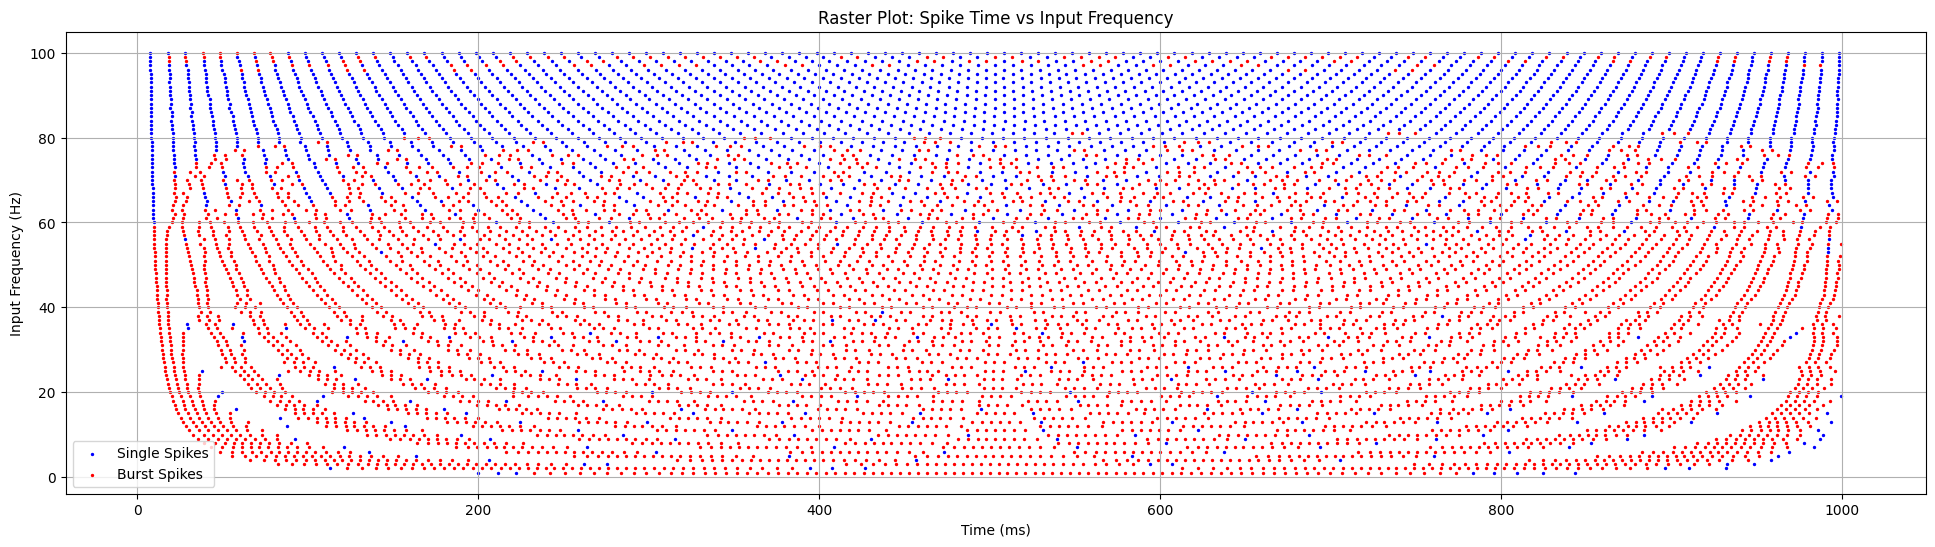

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

dt = 0.1
t = np.arange(0, 1000, dt)
N = len(t)
Cm = 1
Ena = 55
Ek = -90
El = -58
Eh = -32.9
Gl = 0.1
Gm = 0
Gnap = 0
Gk = 6
Gna = 55
Gh = 0

all_spike_times = []
all_freqs = []
burst_spike_times = []
burst_freqs = []
single_spike_times = []
single_freqs = []

burst_counts = []
single_counts = []
spikes_per_burst_all = []

for freq in range(1, 101):
    I_theta = np.array([zap_input(i, freq, dt) for i in range(N)])
    n = np.zeros(N)
    Z = np.zeros(N)
    Vs = np.zeros(N)
    I = np.zeros(N)
    h = np.zeros(N)
    H = np.zeros(N)
    Vs[0] = El

    for j in range(N - 1):
        I[j] = 1

        k1vs = (-Gl * (Vs[j] - El)
                - Gnap * pinf(Vs[j]) * (Vs[j] - Ena)
                - Gm * Z[j] * (Vs[j] - Ek)
                - Gh * H[j] * (Vs[j] - Eh)
                - Gna * (minf(Vs[j]) ** 3) * h[j] * (Vs[j] - Ena)
                - Gk * (n[j] ** 4) * (Vs[j] - Ek)
                + I_theta[j]) / Cm

        k1n = (ninf(Vs[j]) - n[j]) / taun(Vs[j])
        k1Z = (Zinf(Vs[j]) - Z[j]) / 75
        k1h = (hinf(Vs[j]) - h[j]) / tauh(Vs[j])
        k1H = (Hinf(Vs[j]) - H[j]) / tauH(Vs[j])

        avs = Vs[j] + k1vs * dt
        an = n[j] + k1n * dt
        aZ = Z[j] + k1Z * dt
        ah = h[j] + k1h * dt
        aH = H[j] + k1H * dt

        k2vs = (-Gl * (avs - El)
                - Gnap * pinf(avs) * (avs - Ena)
                - Gh * aH * (avs - Eh)
                - Gm * aZ * (avs - Ek)
                - Gna * (minf(avs) ** 3) * ah * (avs - Ena)
                - Gk * (an ** 4) * (avs - Ek)
                + I_theta[j]) / Cm

        k2n = (ninf(avs) - an) / taun(avs)
        k2Z = (Zinf(avs) - aZ) / 75
        k2h = (hinf(avs) - ah) / tauh(avs)
        k2H = (Hinf(avs) - aH) / tauH(avs)

        Vs[j + 1] = Vs[j] + (k1vs + k2vs) * dt / 2
        n[j + 1] = n[j] + (k1n + k2n) * dt / 2
        Z[j + 1] = Z[j] + (k1Z + k2Z) * dt / 2
        h[j + 1] = h[j] + (k1h + k2h) * dt / 2
        H[j + 1] = H[j] + (k1H + k2H) * dt / 2

    peaks, _ = find_peaks(Vs, height=0)
    spike_times = t[peaks]
    isi = np.diff(spike_times)
    burst_threshold = 10

    burst_starts = []
    spikes_per_burst = []
    i = 0
    used_indices = set()
    while i < len(isi):
        if isi[i] < burst_threshold:
            start = i
            count = 2
            used_indices.add(i)
            used_indices.add(i + 1)
            while i + 1 < len(isi) and isi[i + 1] < burst_threshold:
                i += 1
                count += 1
                used_indices.add(i + 1)
            burst_starts.append(start)
            spikes_per_burst.append(count)
        i += 1

    burst_spikes = []
    single_spikes = []
    for idx, spike_time in enumerate(spike_times):
        if idx in used_indices:
            burst_spikes.append(spike_time)
        else:
            single_spikes.append(spike_time)

    burst_counts.append(len(burst_spikes))
    single_counts.append(len(single_spikes))
    spikes_per_burst_all.append(spikes_per_burst)

    burst_spike_times.extend(burst_spikes)
    burst_freqs.extend([freq]*len(burst_spikes))
    single_spike_times.extend(single_spikes)
    single_freqs.extend([freq]*len(single_spikes))

raster_x_burst = np.array(burst_spike_times)
raster_y_burst = np.array(burst_freqs)
raster_x_single = np.array(single_spike_times)
raster_y_single = np.array(single_freqs)

plt.figure(figsize=(24, 6))
plt.scatter(raster_x_single, raster_y_single, s=2, color='blue', label='Single Spikes')
plt.scatter(raster_x_burst, raster_y_burst, s=2, color='red', label='Burst Spikes')
plt.xlabel("Time (ms)")
plt.ylabel("Input Frequency (Hz)")
plt.title("Raster Plot: Spike Time vs Input Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Gk_vals = np.arange(0, 51, 1)
Gna_vals = np.arange(0, 101, 1)

burst_matrix = np.zeros((len(Gk_vals), len(Gna_vals)))
single_matrix = np.zeros((len(Gk_vals), len(Gna_vals)))
spikes_per_burst_all = [[[] for _ in range(len(Gna_vals))] for _ in range(len(Gk_vals))]

dt = 0.1
t = np.arange(0, 1000, dt)
N = len(t)
Cm = 1
Ena = 55
Ek = -90
El = -58
Eh = -32.9
Gl = 0.1
Gm = 1
Gnap = 0
Gh = 0

for i, Gk_var in enumerate(Gk_vals):
    for j, Gna_var in enumerate(Gna_vals):
        n = np.zeros(N)
        Z = np.zeros(N)
        Vs = np.zeros(N)
        I = np.zeros(N)
        h = np.zeros(N)
        H = np.zeros(N)
        Vs[0] = El
        I_theta = np.array([zap_input(k, 10, dt) for k in range(N)])

        for k in range(N - 1):
            I[k] = 1

            k1vs = (-Gl * (Vs[k] - El)
                    - Gnap * pinf(Vs[k]) * (Vs[k] - Ena)
                    - Gm * Z[k] * (Vs[k] - Ek)
                    - Gh * H[k] * (Vs[k] - Eh)
                    - Gna_var * (minf(Vs[k]) ** 3) * h[k] * (Vs[k] - Ena)
                    - Gk_var * (n[k] ** 4) * (Vs[k] - Ek)
                    + I_theta[k]) / Cm

            k1n = (ninf(Vs[k]) - n[k]) / taun(Vs[k])
            k1Z = (Zinf(Vs[k]) - Z[k]) / 75
            k1h = (hinf(Vs[k]) - h[k]) / tauh(Vs[k])
            k1H = (Hinf(Vs[k]) - H[k]) / tauH(Vs[k])

            avs = Vs[k] + k1vs * dt
            an = n[k] + k1n * dt
            aZ = Z[k] + k1Z * dt
            ah = h[k] + k1h * dt
            aH = H[k] + k1H * dt

            k2vs = (-Gl * (avs - El)
                    - Gnap * pinf(avs) * (avs - Ena)
                    - Gh * aH * (avs - Eh)
                    - Gm * aZ * (avs - Ek)
                    - Gna_var * (minf(avs) ** 3) * ah * (avs - Ena)
                    - Gk_var * (an ** 4) * (avs - Ek)
                    + I_theta[k]) / Cm

            k2n = (ninf(avs) - an) / taun(avs)
            k2Z = (Zinf(avs) - aZ) / 75
            k2h = (hinf(avs) - ah) / tauh(avs)
            k2H = (Hinf(avs) - aH) / tauH(avs)

            Vs[k + 1] = Vs[k] + (k1vs + k2vs) * dt / 2
            n[k + 1] = n[k] + (k1n + k2n) * dt / 2
            Z[k + 1] = Z[k] + (k1Z + k2Z) * dt / 2
            h[k + 1] = h[k] + (k1h + k2h) * dt / 2
            H[k + 1] = H[k] + (k1H + k2H) * dt / 2

        peaks, _ = find_peaks(Vs, height=0)
        spike_times = t[peaks]
        isi = np.diff(spike_times)
        burst_threshold = 10

        burst_starts = []
        spikes_per_burst = []
        idx = 0
        used_indices = set()
        while idx < len(isi):
            if isi[idx] < burst_threshold:
                start = idx
                count = 2
                used_indices.add(idx)
                used_indices.add(idx + 1)
                while idx + 1 < len(isi) and isi[idx + 1] < burst_threshold:
                    idx += 1
                    count += 1
                    used_indices.add(idx + 1)
                burst_starts.append(start)
                spikes_per_burst.append(count)
            idx += 1

        burst_spikes = 0
        single_spikes = 0
        for idx, _ in enumerate(spike_times):
            if idx in used_indices:
                burst_spikes += 1
            else:
                single_spikes += 1

        burst_matrix[i, j] = len(spikes_per_burst)
        single_matrix[i, j] = single_spikes
        spikes_per_burst_all[i][j] = spikes_per_burst

plt.figure(figsize=(8, 6))
plt.imshow(burst_matrix, extent=[Gna_vals[0], Gna_vals[-1], Gk_vals[0], Gk_vals[-1]], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label='Burst Spike Count')
plt.xlabel('Gna')
plt.ylabel('Gk')
plt.title('Burst Spike Count Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(single_matrix, extent=[Gna_vals[0], Gna_vals[-1], Gk_vals[0], Gk_vals[-1]], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label='Single Spike Count')
plt.xlabel('Gna')
plt.ylabel('Gk')
plt.title('Single Spike Count Heatmap')
plt.show()


KeyboardInterrupt: 

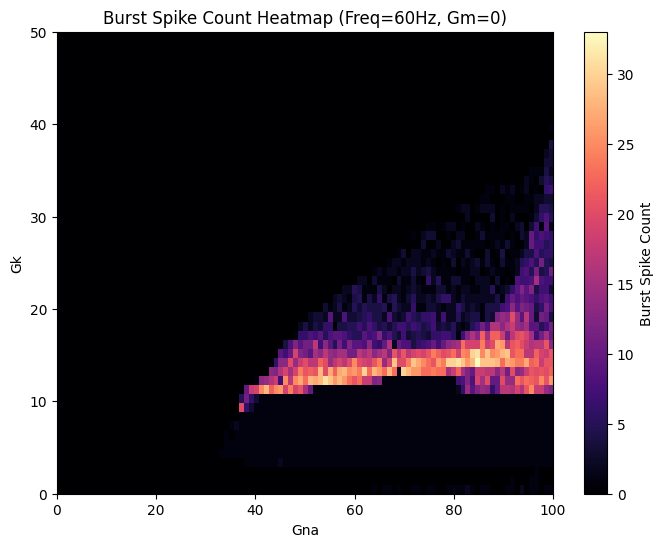

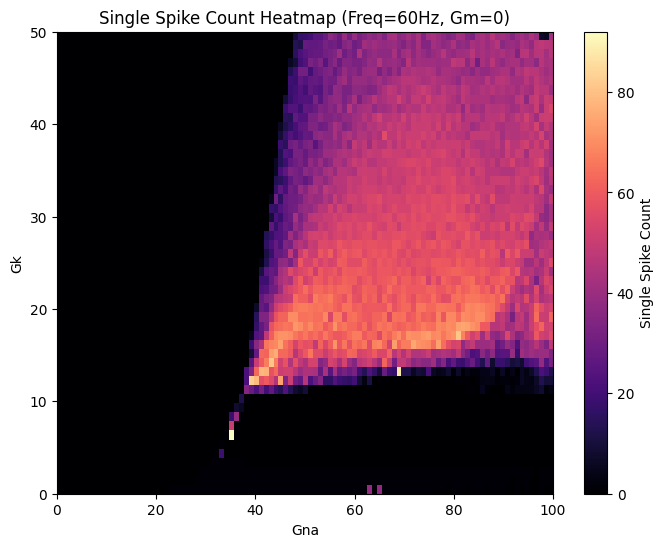

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def run_simulation(freq, gm_val):
    Gk_vals = np.arange(0, 51, 1)
    Gna_vals = np.arange(0, 101, 1)

    burst_matrix = np.zeros((len(Gk_vals), len(Gna_vals)))
    single_matrix = np.zeros((len(Gk_vals), len(Gna_vals)))

    dt = 0.1
    t = np.arange(0, 1000, dt)
    N = len(t)
    Cm = 1
    Ena = 55
    Ek = -90
    El = -58
    Eh = -32.9
    Gl = 0.1
    Gm = gm_val
    Gnap = 0
    Gh = 0

    for i, Gk_var in enumerate(Gk_vals):
        for j, Gna_var in enumerate(Gna_vals):
            n = np.zeros(N)
            Z = np.zeros(N)
            Vs = np.zeros(N)
            I = np.zeros(N)
            h = np.zeros(N)
            H = np.zeros(N)
            Vs[0] = El
            I_theta = np.array([zap_input(k, freq, dt) for k in range(N)])

            for k in range(N - 1):
                I[k] = 1

                k1vs = (-Gl * (Vs[k] - El)
                        - Gnap * pinf(Vs[k]) * (Vs[k] - Ena)
                        - Gm * Z[k] * (Vs[k] - Ek)
                        - Gh * H[k] * (Vs[k] - Eh)
                        - Gna_var * (minf(Vs[k]) ** 3) * h[k] * (Vs[k] - Ena)
                        - Gk_var * (n[k] ** 4) * (Vs[k] - Ek)
                        + I_theta[k]) / Cm

                k1n = (ninf(Vs[k]) - n[k]) / taun(Vs[k])
                k1Z = (Zinf(Vs[k]) - Z[k]) / 75
                k1h = (hinf(Vs[k]) - h[k]) / tauh(Vs[k])
                k1H = (Hinf(Vs[k]) - H[k]) / tauH(Vs[k])

                avs = Vs[k] + k1vs * dt
                an = n[k] + k1n * dt
                aZ = Z[k] + k1Z * dt
                ah = h[k] + k1h * dt
                aH = H[k] + k1H * dt

                k2vs = (-Gl * (avs - El)
                        - Gnap * pinf(avs) * (avs - Ena)
                        - Gh * aH * (avs - Eh)
                        - Gm * aZ * (avs - Ek)
                        - Gna_var * (minf(avs) ** 3) * ah * (avs - Ena)
                        - Gk_var * (an ** 4) * (avs - Ek)
                        + I_theta[k]) / Cm

                k2n = (ninf(avs) - an) / taun(avs)
                k2Z = (Zinf(avs) - aZ) / 75
                k2h = (hinf(avs) - ah) / tauh(avs)
                k2H = (Hinf(avs) - aH) / tauH(avs)

                Vs[k + 1] = Vs[k] + (k1vs + k2vs) * dt / 2
                n[k + 1] = n[k] + (k1n + k2n) * dt / 2
                Z[k + 1] = Z[k] + (k1Z + k2Z) * dt / 2
                h[k + 1] = h[k] + (k1h + k2h) * dt / 2
                H[k + 1] = H[k] + (k1H + k2H) * dt / 2

            peaks, _ = find_peaks(Vs, height=0)
            spike_times = t[peaks]
            isi = np.diff(spike_times)
            burst_threshold = 10

            used_indices = set()
            spikes_per_burst = []
            idx = 0
            while idx < len(isi):
                if isi[idx] < burst_threshold:
                    count = 2
                    used_indices.add(idx)
                    used_indices.add(idx + 1)
                    while idx + 1 < len(isi) and isi[idx + 1] < burst_threshold:
                        idx += 1
                        count += 1
                        used_indices.add(idx + 1)
                    spikes_per_burst.append(count)
                idx += 1

            burst_spikes = 0
            single_spikes = 0
            for idx in range(len(spike_times)):
                if idx in used_indices:
                    burst_spikes += 1
                else:
                    single_spikes += 1

            burst_matrix[i, j] = len(spikes_per_burst)
            single_matrix[i, j] = single_spikes

    return burst_matrix, single_matrix

frequencies = [60, 80]
gm_values = [0, 1]

for freq in frequencies:
    for gm in gm_values:
        burst, single = run_simulation(freq, gm)

        plt.figure(figsize=(8, 6))
        plt.imshow(burst, extent=[0, 100, 0, 50], origin='lower', aspect='auto', cmap='magma')
        plt.colorbar(label='Burst Spike Count')
        plt.xlabel('Gna')
        plt.ylabel('Gk')
        plt.title(f'Burst Spike Count Heatmap (Freq={freq}Hz, Gm={gm})')
        plt.show()

        plt.figure(figsize=(8, 6))
        plt.imshow(single, extent=[0, 100, 0, 50], origin='lower', aspect='auto', cmap='magma')
        plt.colorbar(label='Single Spike Count')
        plt.xlabel('Gna')
        plt.ylabel('Gk')
        plt.title(f'Single Spike Count Heatmap (Freq={freq}Hz, Gm={gm})')
        plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks


# all_spike_times = []
# all_freqs = []
# burst_counts = []
# single_counts = []

# for freq in range(1, 101):
#     I_chirp = np.array([zap_input(i, freq, dt) for i in range(N)])
#     n = np.zeros(N)
#     Z = np.zeros(N)
#     Vs = np.zeros(N)
#     I = np.zeros(N)
#     h = np.zeros(N)
#     H = np.zeros(N)
#     Vs[0] = El

#     for j in range(N - 1):
#         I[j] = 1

#         k1vs = (-Gl * (Vs[j] - El)
#                 - Gnap * pinf(Vs[j]) * (Vs[j] - Ena)
#                 - Gm * Z[j] * (Vs[j] - Ek)
#                 - Gh * H[j] * (Vs[j] - Eh)
#                 - Gna * (minf(Vs[j]) ** 3) * h[j] * (Vs[j] - Ena)
#                 - Gk * (n[j] ** 4) * (Vs[j] - Ek)
#                 + I_chirp[j]) / Cm

#         k1n = -n[j] / 1
#         k1Z = -Z[j] / 75
#         k1h = -h[j] / 1
#         k1H = -H[j] / 1

#         avs = Vs[j] + k1vs * dt
#         an = n[j] + k1n * dt
#         aZ = Z[j] + k1Z * dt
#         ah = h[j] + k1h * dt
#         aH = H[j] + k1H * dt

#         k2vs = (-Gl * (avs - El)
#                 - Gnap * pinf(avs) * (avs - Ena)
#                 - Gh * aH * (avs - Eh)
#                 - Gm * aZ * (avs - Ek)
#                 - Gna * (minf(avs) ** 3) * ah * (avs - Ena)
#                 - Gk * (an ** 4) * (avs - Ek)
#                 + I_chirp[j]) / Cm

#         k2n = -an / 1
#         k2Z = -aZ / 75
#         k2h = -ah / 1
#         k2H = -aH / 1

#         Vs[j + 1] = Vs[j] + (k1vs + k2vs) * dt / 2
#         n[j + 1] = n[j] + (k1n + k2n) * dt / 2
#         Z[j + 1] = Z[j] + (k1Z + k2Z) * dt / 2
#         h[j + 1] = h[j] + (k1h + k2h) * dt / 2
#         H[j + 1] = H[j] + (k1H + k2H) * dt / 2

#     peaks, _ = find_peaks(Vs, height=0)
#     spike_times = t[peaks]
#     all_spike_times.append(spike_times)
#     all_freqs.append(np.full_like(spike_times, freq))

#     isi = np.diff(spike_times)
#     burst_threshold = 20
#     burst_indices = np.where(isi < burst_threshold)[0]

#     burst_starts = []
#     i = 0
#     while i < len(isi) - 1:
#         if isi[i] < burst_threshold:
#             start = i
#             while i < len(isi) and isi[i] < burst_threshold:
#                 i += 1
#             if i - start >= 1:
#                 burst_starts.append(start)
#         else:
#             i += 1

#     bursts = len(burst_starts)
#     singles = len(spike_times) - sum([(isi[i+1] - isi[i] < burst_threshold) for i in burst_starts]) - bursts
#     burst_counts.append(bursts)
#     single_counts.append(singles)

# raster_x = np.concatenate(all_spike_times)
# raster_y = np.concatenate(all_freqs)

# plt.figure(figsize=(14, 6))
# plt.scatter(raster_x, raster_y, s=2, color='black')
# plt.xlabel("Time (ms)")
# plt.ylabel("Input Frequency (Hz)")
# plt.title("Raster Plot: Spike Time vs Input Frequency")
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(14, 6))
# plt.plot(range(1, 101), burst_counts, label='Bursts', color='red')
# plt.plot(range(1, 101), single_counts, label='Single Spikes', color='blue')
# plt.xlabel("Input Frequency (Hz)")
# plt.ylabel("Count")
# plt.title("Burst vs Single Spike Count")
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
def compute_impedance_fft(V, I, dt, smooth_sigma=None, f_max=None):
    N = len(V)
    # FFTs (remove DC offset first!)
    V_fft = np.fft.fft(V - np.mean(V))
    I_fft = np.fft.fft(I - np.mean(I))

    # Impedance spectrum
    Z = np.abs(V_fft / I_fft)[:N//2]
    freqs = np.fft.fftfreq(N, dt/1000)[:N//2]  # dt in ms → s

    # Mask out DC and optionally limit to f_max
    mask = freqs > 1   # throw away 0 Hz
    if f_max is not None:
        mask &= (freqs <= f_max)

    freqs, Z = freqs[mask], Z[mask]

    # Optional smoothing
    if smooth_sigma is not None:
        Z = gaussian_filter1d(Z, sigma=smooth_sigma)

    return freqs, Z




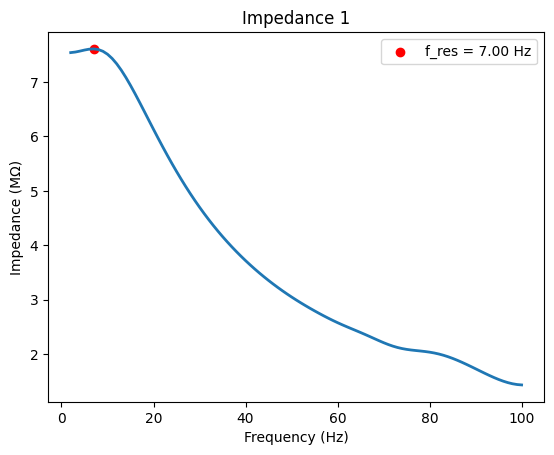

In [ ]:
freq_cycles_1, Z_cycles_1 = compute_impedance_fft(Vs, I_chirp, dt,smooth_sigma=5,f_max=100)

f_res_1 = freq_cycles_1[np.argmax(Z_cycles_1)]
Z_max_1 = Z_cycles_1.max()

plt.plot(freq_cycles_1, Z_cycles_1, lw=2)
plt.scatter(f_res_1, Z_max_1, color='red', label=f"f_res = {f_res_1:.2f} Hz")
plt.title("Impedance")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance (MΩ)")
plt.legend()